In [1]:
%load_ext autoreload
%env CUDA_VISIBLE_DEVICES=
%env PROJECTS_BASE=/crimea

import sys
sys.path.append('../..')

env: CUDA_VISIBLE_DEVICES=
env: PROJECTS_BASE=/crimea


In [33]:
%autoreload
import collections, itertools, math, os, shutil, time
import matplotlib.pyplot as plt, scipy.stats as ss
from tqdm import tqdm_notebook
from hyperopt import pyll, hp
from hyperopt import plotting as hyplt
plt.style.use('ggplot')
%matplotlib inline

from pprint import pprint

from latent_patient_trajectories.data_utils import *
from latent_patient_trajectories.constants import *

from latent_patient_trajectories.representation_learner.args import *
from latent_patient_trajectories.representation_learner.dataset import *
from latent_patient_trajectories.representation_learner.evaluator import *
from latent_patient_trajectories.representation_learner.meta_model import *
from latent_patient_trajectories.representation_learner.hyperparameter_search import *

In [3]:
ANALYSIS_DIRS = [
    '/data/scratch/mmd/latent_patient_trajectories/chil_submission/hyperparameter_search_merged_final_final/no_notes/',
    '/data/scratch/mmd/latent_patient_trajectories/chil_submission/hyperparameter_search_real_final/no_notes/',
]

## Analyze Config

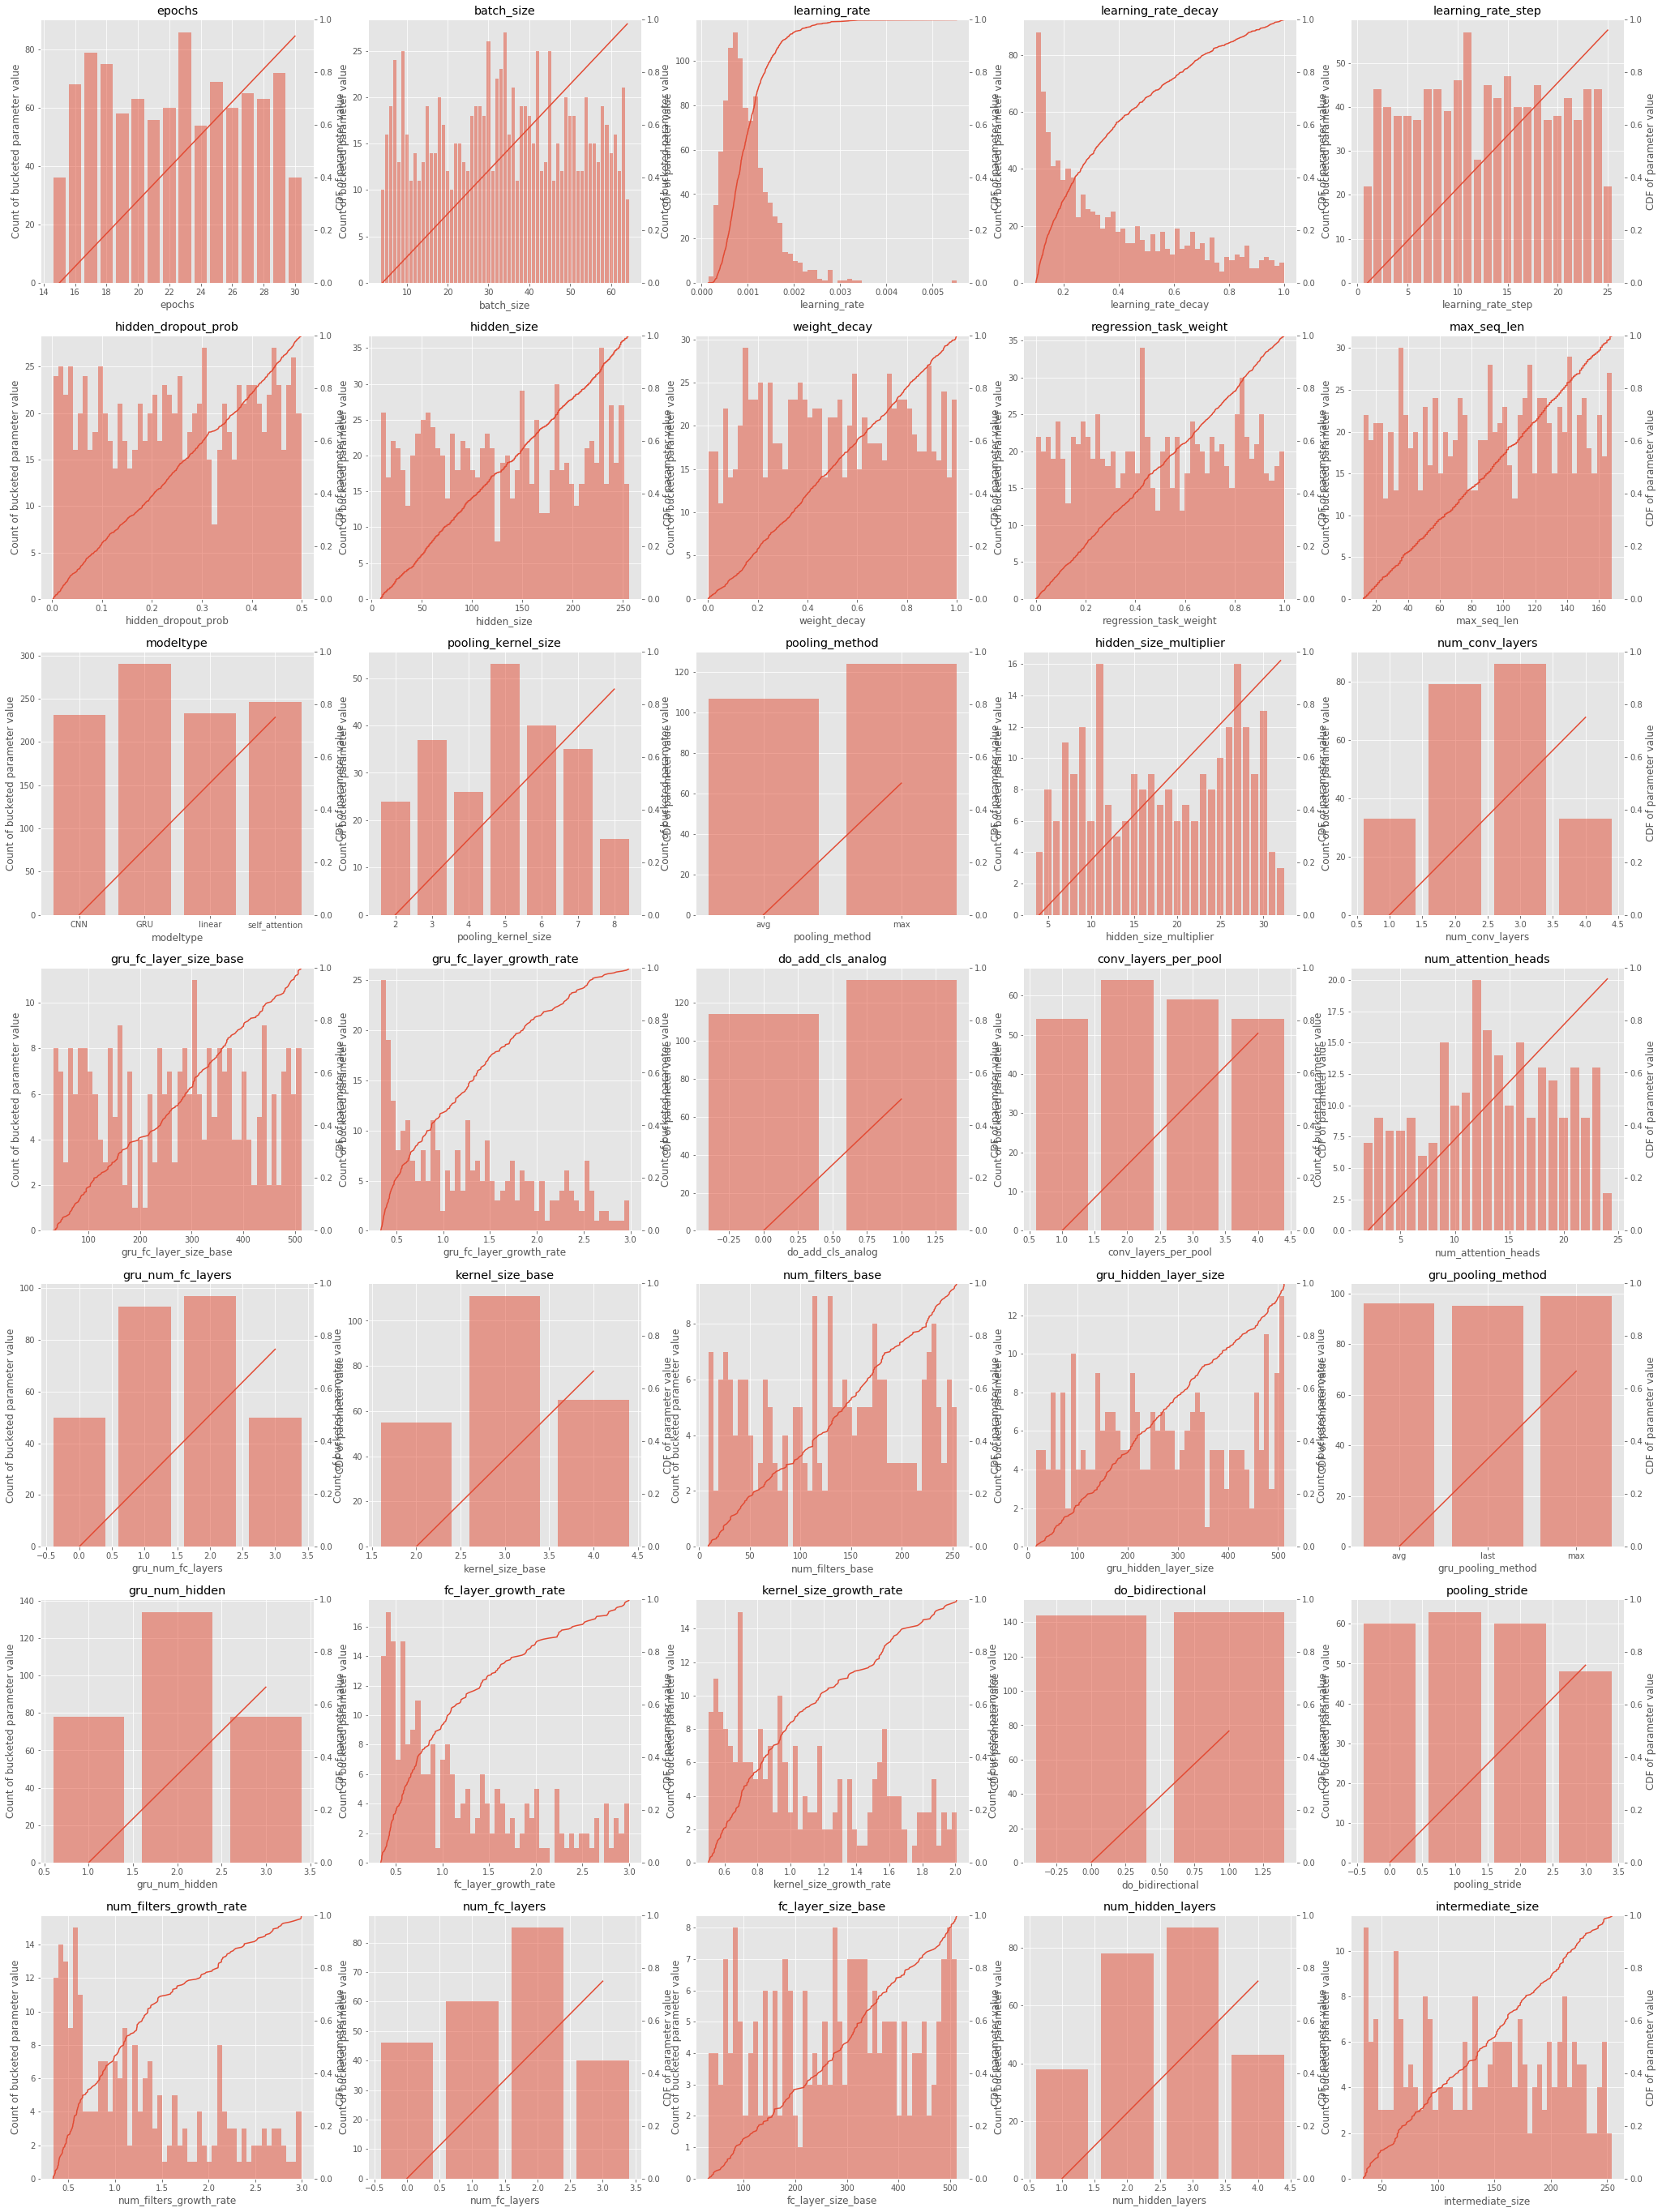

In [4]:
plot_config(ANALYSIS_DIRS[0], overwrite=True, tqdm=tqdm_notebook)

## Read Results
### Error Analysis

In [ ]:
errors = get_errors(ANALYSIS_DIRS)

In [138]:
len(errors['0'])

82

In [139]:
print(set(k for k, v in errors['0'].items() if v[2]))

{'675e2d0d29725c487217c40c05f3847c', '995995b9707a7b225425c1438962aa92', '5da21bf29d649a9f924df9788be1e85a', 'fbfb589ac7d125952f8279c5b2356225', 'd6353900ebc4e57c2ad1e2966603de6d', '4a30255bb0cfd5bba063d3365aeda692', 'fe9c5190fe8f2b25882ef761ce6519ae', 'b196e7eeb13ea738948243a63f0f65a9', '9a7ab78dc8a2477e98e8ff33a6577131', 'cd570a8eaef4907aac697c73043e6d9a', '5b07c318490ca97526440a121aedfcd2', 'd48332e2961178394ea0683d4381002e', 'fdc060c54ee05f7cf47c5f238d43928a', '229954cbdbeadf836427dd10d0a8e0ce', 'fdd10aaf641420366fef099736f5408d', '4d557e373921884928ca91fce9fe954e', '3d70db133eaeaff84a1a1ac628d73ff6', '227994c06c31cdde8cdd1a4b87230b44', '1932c0c52f564c8419a95fc29168c11b', '1f06dbce6573d56458a84de850de2c1d', '2a520d21516b2382298919983ad18c85', 'b560f4190b660b9325e2ad14dee83bfd', '9f3aef96c39e33c47c03a588455b5955', '6e06fce1e522bba80e628f4ae7e50df6', 'fd54fb9e00ab6bc86db76b38ffd2a2c7'}


In [124]:
filt_errors = {
    k: v for k, v in errors['0'].items() if v[0] != True \
    and not v[2] \
    and v[1] > datetime.strptime('01/04/20 15:00', '%m/%d/%y %H:%M')
}

pprint({k: (v[0], str(v[1]), v[2], v[3]) for k, v in filt_errors.items()})

{'0019e790f9fb919025c7832e3bf2f45e': (RuntimeError('dimension specified as 0 but tensor has no dimensions'),
                                      '2020-01-07 04:06:10.158507',
                                      False,
                                      {'batch_size': 23.0,
                                       'epochs': 21.0,
                                       'hidden_dropout_prob': 0.03428662081900952,
                                       'hidden_size': 150.0,
                                       'learning_rate': 0.0003090004865594332,
                                       'modeltype': ('linear', {})}),
 '0363d853f477160bb04802b3fafe528c': (RuntimeError('dimension specified as 0 but tensor has no dimensions'),
                                      '2020-01-06 17:52:52.166949',
                                      False,
                                      {'batch_size': 11.0,
                                       'epochs': 24.0,
                                   

### Completed Result Analysis

In [34]:
config_st, results_raw_st, args_st, params_st, trials_st = read_many_dirs(
    [
        '/data/scratch/mmd/latent_patient_trajectories/sp_20_submission/single_task_hyperparameter_search/'
    ], tqdm=tqdm_notebook, overwrite=True,
)

print("Found %d samples" % len(results_raw['0']))

Observe runs for rotations: 0


Missing tuning for a218c0105554185969a3863476274abe
Wasn't given a tuning dataset!
Run 9219d19fef09f5cf9232983c7a43dcd1 Still training (or errored and didn't report)
Run 75ae692775e1b351ddac6f8b38c8530f Still training (or errored and didn't report)
Run 3e7d2ed6dafaa8cfaac57ff2f7c6e3e8 Still training (or errored and didn't report)
Run 858a53d9ec38ac76776ae2f7ae85e559 Still training (or errored and didn't report)
Run 05a98b31c97d799d5ee3ce18d546600d Still training (or errored and didn't report)
Run 2afac3a49838cacee8f176a25d15a2d8 Still training (or errored and didn't report)
Run 6f461489dbe5f0d18bdb7ab8e97d7d88 Still training (or errored and didn't report)
Run 15ea2715de6bcca5e102cc426e2e8245 Still training (or errored and didn't report)
Found 79 samples


In [36]:
trials_st['0'].best_trial

{'tid': '8ef7a2fbf3f9bb943192269dbbaf2fd3',
 'spec': {'batch_size': 28.0,
  'epochs': 26.0,
  'hidden_dropout_prob': 0.4811319011375842,
  'hidden_size': 133.0,
  'learning_rate': 0.0006096595765508481,
  'learning_rate_decay': 0.19134904398736752,
  'learning_rate_step': 20.0,
  'max_seq_len': 60.0,
  'modeltype': ('linear', {}),
  'weight_decay': 0.8418123095825207},
 'result': {'status': 'ok',
  'loss': -0.38706121257578574,
  'loss_variance': 0.05694033910847082,
  'test_loss': -0.38932643422499646,
  'test_loss_variance': 0.05812025329103891},
 'misc': {'tid': '8ef7a2fbf3f9bb943192269dbbaf2fd3',
  'cmd': '',
  'idxs': [],
  'vals': {'batch_size': [28.0],
   'epochs': [26.0],
   'hidden_dropout_prob': [0.4811319011375842],
   'hidden_size': [133.0],
   'learning_rate': [0.0006096595765508481],
   'learning_rate_decay': [0.19134904398736752],
   'learning_rate_step': [20.0],
   'max_seq_len': [60.0],
   'modeltype': [('linear', {})],
   'weight_decay': [0.8418123095825207]}},
 'stat

In [13]:
config, results_raw, args, params, trials = read_many_dirs(
    ANALYSIS_DIRS, tqdm=tqdm_notebook, overwrite=True,
)

print("Found %d samples" % len(results_raw['0']))

Observe runs for rotations: 0


Run 82c1b0793064ac6c326392d628c8ebf5 Still training (or errored and didn't report)
Run f685329bbe0ab5d6de983d378c088574 Still training (or errored and didn't report)
Run 21b89a2f980e7bbd4b87c76dcf6d1fbe Still training (or errored and didn't report)
Run f2f60b5ef66fcf72eeea97bee250de39 Still training (or errored and didn't report)
Run 207dca38e6780e5a5e76f5b11d92b54d Still training (or errored and didn't report)
Run 93328854d405ebbc2138676618e7b9ad Still training (or errored and didn't report)
Run 94ee306067911d50fa71da93da8abaf9 Still training (or errored and didn't report)
Run 6052f5673ac51ad776af494d4b0a354c Still training (or errored and didn't report)
Run a24f6f4545b8205b2737dba46759cc79 Still training (or errored and didn't report)
Run af2ff445ac22bde813130c4c081c3f51 Still training (or errored and didn't report)
Run a91def35c9c49a10af4dfebba97ed87c Still training (or errored and didn't report)
Run f58a3a2f0fd0b6647b07606dc079dc2c Still training (or errored and didn't report)
Run 

Run f58a3a2f0fd0b6647b07606dc079dc2c Still training (or errored and didn't report)
Run bf7fd6c596b6d4864d2be8d4c3e18415 Still training (or errored and didn't report)
Run 003e5ce3c68dc21ef9cc968c49f16e6d Still training (or errored and didn't report)
Run b515605d17b463cc2843c23e106f970e Still training (or errored and didn't report)
Run cd7a403e28aa1b1dd6b29ece8d12cfcc Still training (or errored and didn't report)
Run 43a39c5ced344bedb2a034d04b3985ba Still training (or errored and didn't report)
Run 21b89a2f980e7bbd4b87c76dcf6d1fbe Still training (or errored and didn't report)
Run 207dca38e6780e5a5e76f5b11d92b54d Still training (or errored and didn't report)
Run 93328854d405ebbc2138676618e7b9ad Still training (or errored and didn't report)
Run 94ee306067911d50fa71da93da8abaf9 Still training (or errored and didn't report)
Run a24f6f4545b8205b2737dba46759cc79 Still training (or errored and didn't report)
Run 6052f5673ac51ad776af494d4b0a354c Still training (or errored and didn't report)
Run 

In [14]:
params_pdf_filepath = os.path.join(ANALYSIS_DIRS[0], 'config_samples.pkl')
if os.path.exists(params_pdf_filepath):
    with open(params_pdf_filepath, mode='rb') as f: param_pdfs = flatten_samples(pickle.load(f))
else:
    param_pdfs = {
        p: [pyll.stochastic.sample(g) for _ in range(50000)] for p, g in tqdm_notebook(config[0].items())
    }
    with open(params_pdf_filepath, mode='wb') as f: pickle.dump(param_pdfs, f)

In [15]:
results, errs, param_vals, param_cdfs = [], [], collections.defaultdict(list), collections.defaultdict(list)
for t in trials['0'].trials:
    result = t['result']['loss']
    result_err = np.sqrt(t['result']['loss_variance'])
    
    param_val = copy.deepcopy(t['spec'])
    for k, v in param_val['modeltype'][1].items(): param_val[k] = v
    param_val['modeltype'] = param_val['modeltype'][0]
    
    param_cdf = {
        p: (
            np.mean([1 if x < v else 0 for x in param_pdfs[p] if not np.isnan(x)])
        ) for p, v in param_val.items() if type(v) is not str and p != 'pooling_stride' and p != 'batches_per_gradient'
    }
    results.append(result)
    errs.append(result_err)
    for k in param_val:
        param_vals[k].append(param_val[k])
        if k in param_cdf: param_cdfs[k].append(param_cdf[k])

best_result_idx = np.argmin(results)

Failed to compute spearmanr for learning_rate_decay
all the input array dimensions except for the concatenation axis must match exactly
Failed to compute spearmanr for learning_rate_decay
all the input array dimensions except for the concatenation axis must match exactly
Failed to compute spearmanr for learning_rate_decay
all the input array dimensions except for the concatenation axis must match exactly
Failed to compute spearmanr for learning_rate_decay
all the input array dimensions except for the concatenation axis must match exactly
Failed to compute spearmanr for learning_rate_step
all the input array dimensions except for the concatenation axis must match exactly
Failed to compute spearmanr for learning_rate_step
all the input array dimensions except for the concatenation axis must match exactly
Failed to compute spearmanr for learning_rate_step
all the input array dimensions except for the concatenation axis must match exactly
Failed to compute spearmanr for learning_rate_step


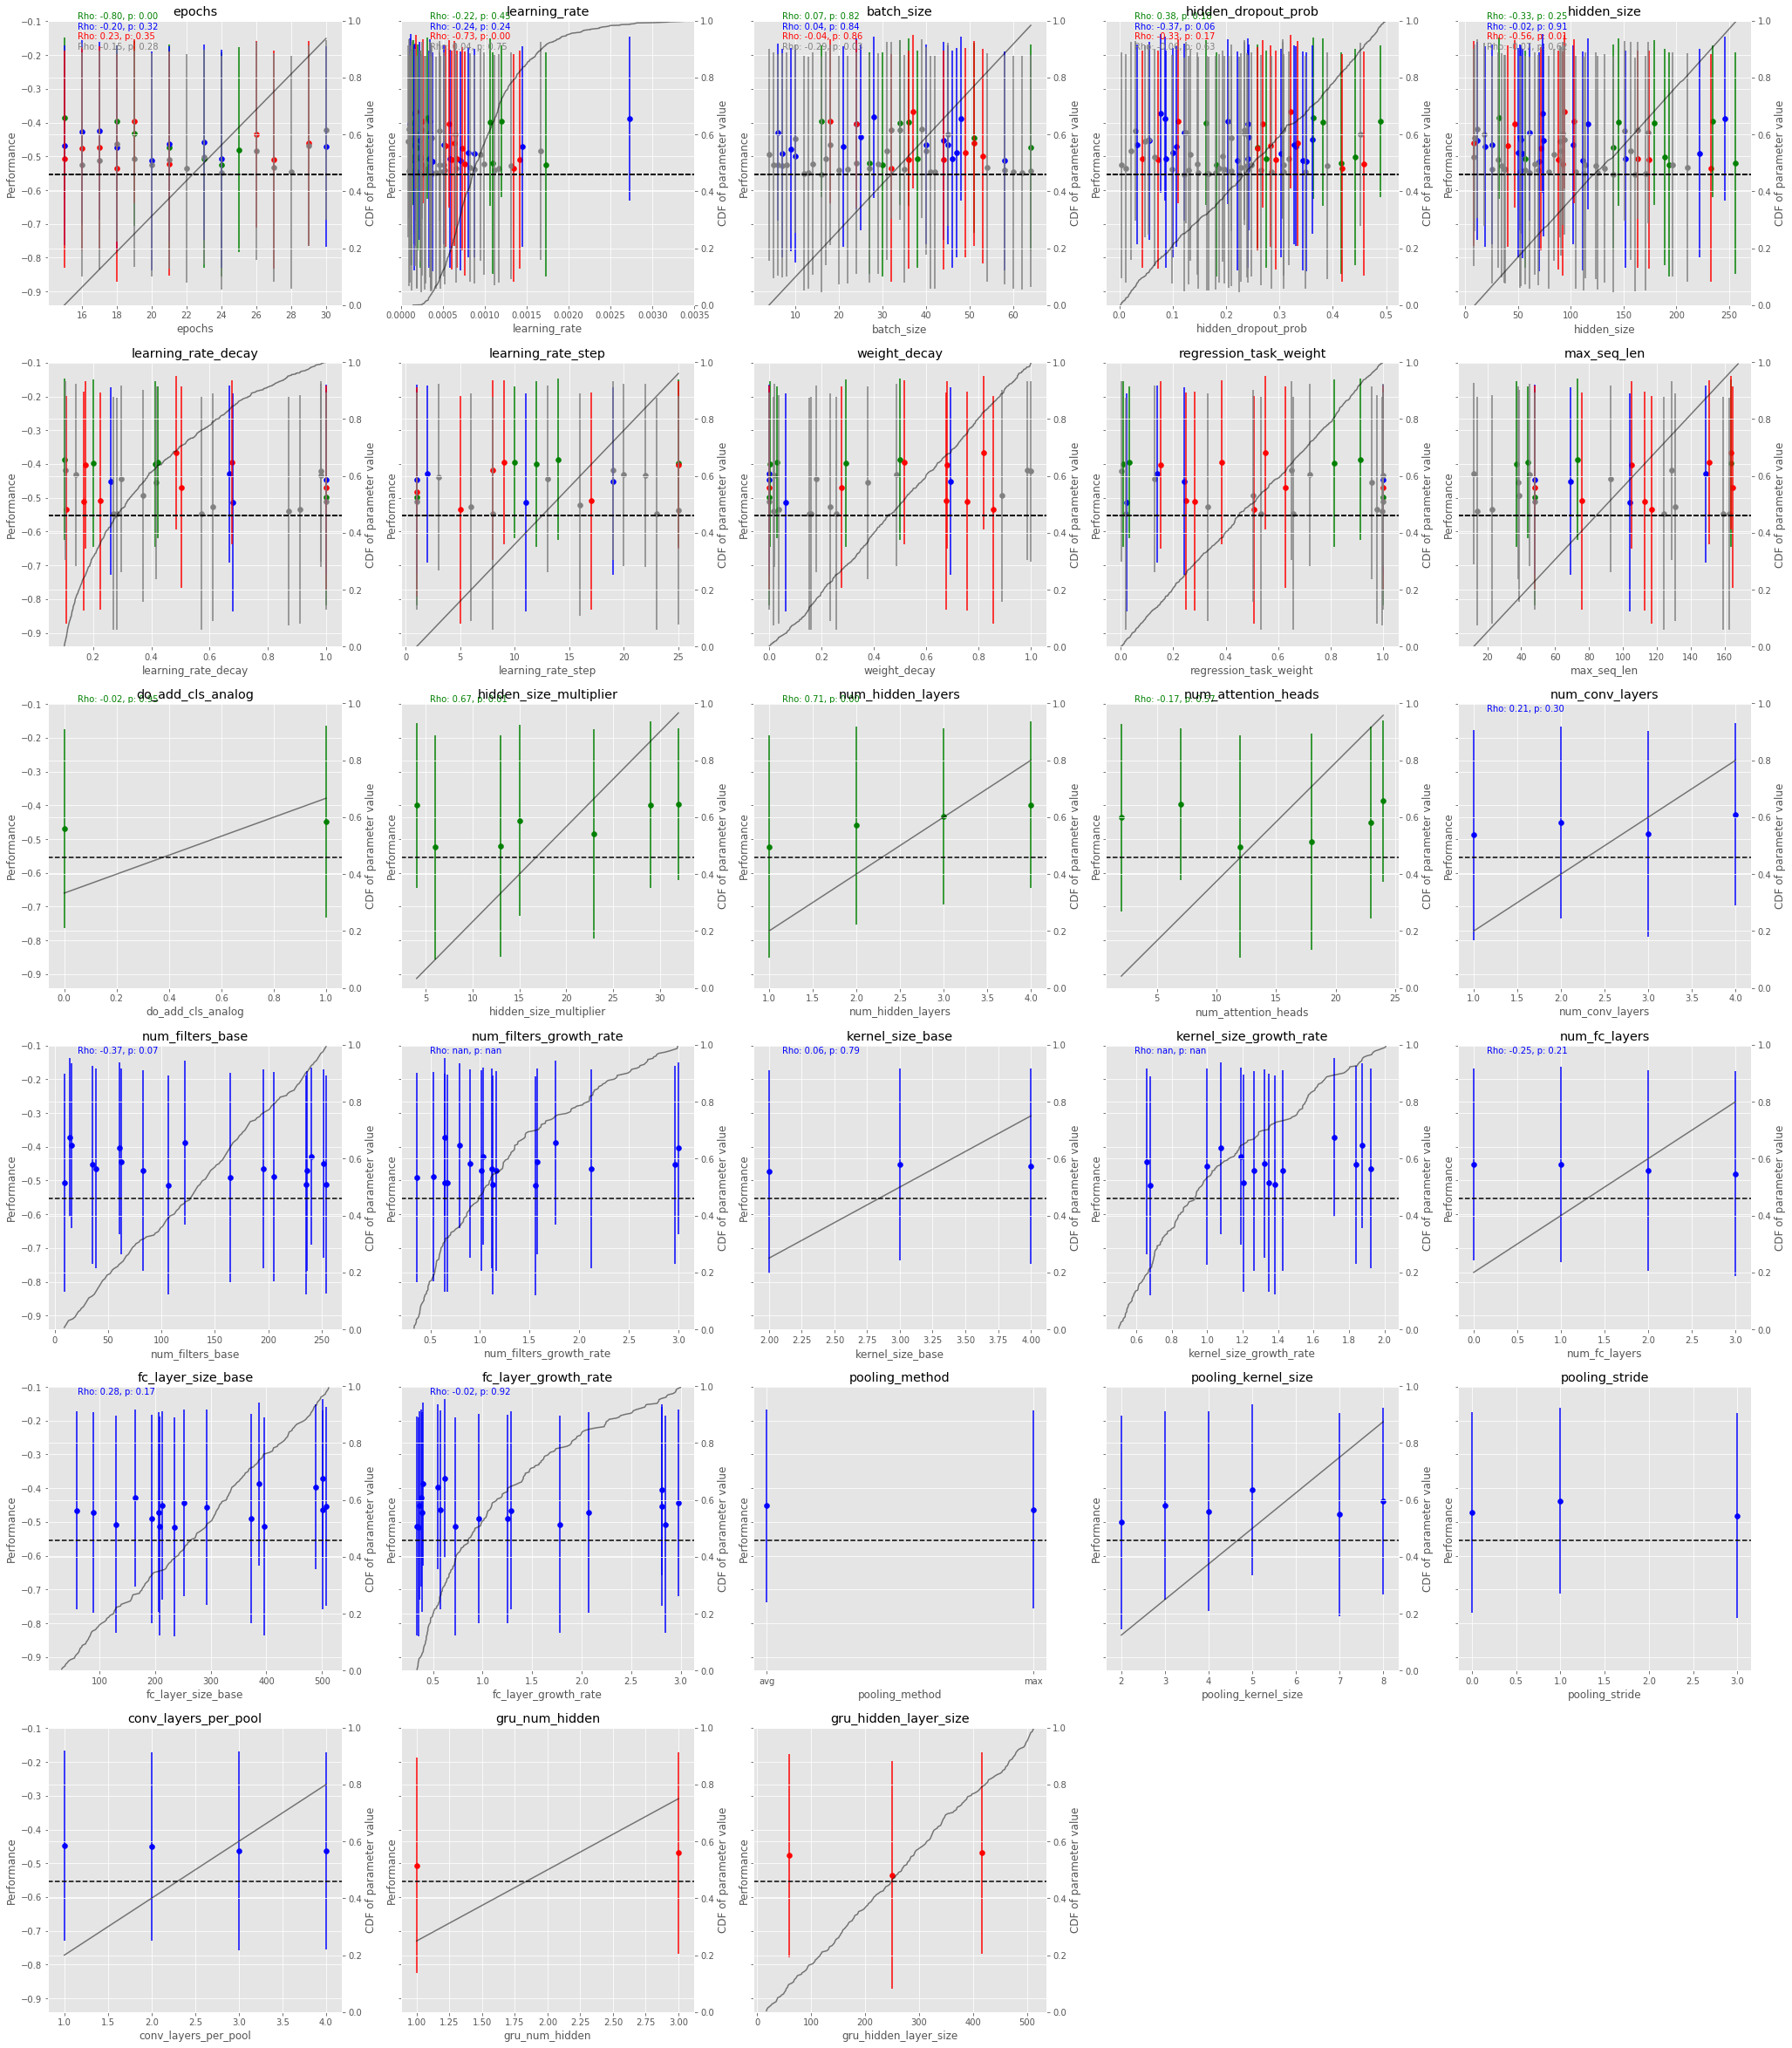

In [16]:
params = [
    'epochs', 'learning_rate', 'batch_size', 'hidden_dropout_prob', 'hidden_size', 'learning_rate_decay',
    'learning_rate_step', 'weight_decay', 'regression_task_weight', 'max_seq_len'
]
nested_params = {
    'self_attention': [
        'do_add_cls_analog', 'hidden_size_multiplier', 'num_hidden_layers', 'num_attention_heads'
    ],
    'CNN': [
        'num_conv_layers', 'num_filters_base', 'num_filters_growth_rate', 'kernel_size_base',
        'kernel_size_growth_rate', 'num_fc_layers', 'fc_layer_size_base', 'fc_layer_growth_rate',
        'pooling_method', 'pooling_kernel_size', 'pooling_stride', 'conv_layers_per_pool'
    ],
    'GRU': ['gru_num_hidden', 'gru_hidden_layer_size',],
    'linear': []
}

modeltypes = ('self_attention', 'CNN', 'GRU', 'linear')

params_flt = params + list(itertools.chain.from_iterable(nested_params[k] for k in modeltypes))
N = len(params_flt)
W = math.floor(math.sqrt(N))
H = math.ceil(N / W)

fig, axes = plt.subplots(nrows=H, ncols=W, sharey=True, figsize=(7*W, 7*H))
axes = list(itertools.chain.from_iterable(axes))

params_to_axes = {p: ax for p, ax in zip(params_flt, axes)}
for ax in axes[len(params_flt):]: ax.axis('off')

COLORS = {'self_attention': 'green', 'CNN': 'blue', 'GRU': 'red', 'linear': 'gray'}

for p, ax in params_to_axes.items():
    if p == 'learning_rate': ax.set_xlim((0, 0.0035))
    ax.set_title(p)
    ax.set_ylabel('Performance')
    ax.set_xlabel(p)
    if p in param_cdfs:
        cdf_ax = ax.twinx()
        cdf_ax.set_ylim(0, 1)
        cdf_ax.set_ylabel('CDF of parameter value')
        cdf_X = sorted(list(set(param_pdfs[p])))
        cdfs = [i/len(cdf_X) for i, x in enumerate(cdf_X)]

        cdf_ax.plot(cdf_X, cdfs, color='k', alpha=0.5)
            
    for modeltype, allowed_params in nested_params.items():
        if p not in params and p not in allowed_params: continue

        if p in params:
            allowed_vals = [v for m, v in zip(param_vals['modeltype'], param_vals[p]) if m == modeltype]
        else: allowed_vals = [v for v in param_vals[p]]
            
        if not allowed_vals: continue
            
        allowed_results = [v for m, v in zip(param_vals['modeltype'], results) if m == modeltype]
        allowed_errs = [v for m, v in zip(param_vals['modeltype'], errs) if m == modeltype]
        
        if p == 'pooling_stride': allowed_vals = [0 if v is None or v == 'None' else v for v in allowed_vals]
        
        try:
            X = sorted(list(set(allowed_vals))) # X might be oversampled.
        except:
            print(p, set(allowed_vals))
            raise
            
        # First group by x
        Y = [[y for x2, y in zip(allowed_vals, allowed_results) if x2 == x] for x in X]
        yerr = [[err for x2, err in zip(allowed_vals, allowed_errs) if x2 == x] for x in X]

        try:
            rho, p_val = ss.spearmanr(allowed_vals, allowed_results)
            text_list = ['', '', '', '']
            idx = next(i for i, m in enumerate(modeltypes) if m == modeltype)
        
            text_list[idx] = "Rho: %.2f, p: %.2f" % (rho, p_val)
        
            ax.text(
                0.1, 0.9, '\n'.join(text_list), transform=ax.transAxes, color=COLORS[modeltype]
            )
        except Exception as e:
            print("Failed to compute spearmanr for %s" % p)
            print(e)
            pass

        # Then post-process.
        Y = [np.mean(ys) for ys in Y]
        yerr = [np.sqrt(np.mean([e**2 for e in es])) for es in yerr]

        ax.scatter(X, Y, color=COLORS[modeltype])
    #     cdf_ax.hist(X, density=True)
        ax.errorbar(X, Y, xerr=None, yerr=yerr, fmt='none', fontsize=14, color=COLORS[modeltype])

        ax.axhline(y=results[best_result_idx], linestyle='dashed', color='k')
#         ax.scatter([param_vals[p][best_result_idx]], [results[best_result_idx]], color='k')
#         ax.errorbar(
#             [param_vals[p][best_result_idx]], [results[best_result_idx]], xerr=None, yerr=[errs[best_result_idx]],
#             ecolor='k', fmt='none'
#         )

avg best error: -0.5248952395303872


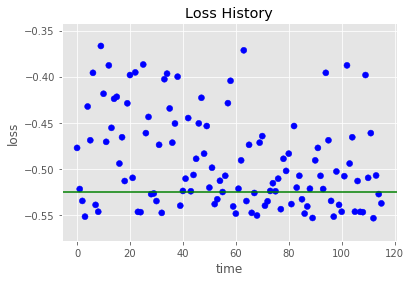

In [17]:
hyplt.main_plot_history(trials['0'])

Showing Histogram of 116 jobs


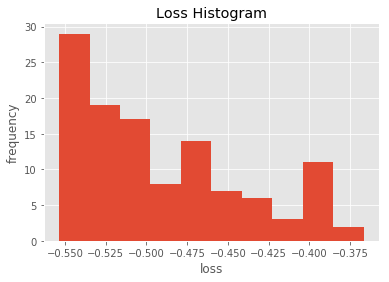

In [18]:
hyplt.main_plot_histogram(trials['0'])

## Single Task Results

In [38]:
best_acuity = (None, 0)
for k, r in results_raw_st['0'].items():
    val_m = get_manuscript_metrics(r[0])['Imminent Mortality']
    if val_m > best_acuity[1]:
        best_acuity = (k, val_m)

print(best_acuity, get_manuscript_metrics(results_raw_st['0'][best_acuity[0]][1])['Imminent Mortality'])

('94469fcdaa14b8e0ef31695b75182a5f', 0.907667555454786) 0.8833652752204897


In [21]:
best_acuity = (None, 0)
for k, r in results_raw['0'].items():
    val_m = get_manuscript_metrics(r[0])['Imminent Mortality']
    if val_m > best_acuity[1]:
        best_acuity = (k, val_m)

print(best_acuity, get_manuscript_metrics(results_raw['0'][best_acuity[0]][1])['Imminent Mortality'])

('2489f5b15fab788e35e04d0f984ebe39', 0.9537893729919187) 0.9423181972977415


In [24]:
T_KEY = 'Long LOS'
best_acuity = (None, 0)
for k, r in results_raw['0'].items():
    val_m = get_manuscript_metrics(r[0])[T_KEY]
    if val_m > best_acuity[1]:
        best_acuity = (k, val_m)

print(best_acuity, get_manuscript_metrics(results_raw['0'][best_acuity[0]][1])[T_KEY])

('b1a1072a1519a29fd2a6f5a26ff427ab', 0.7121225120109814) 0.7087556860615113


In [30]:
T_KEY = 'ICD Code Prediction'
best_acuity = (None, 0)
for k, r in results_raw['0'].items():
    val_m = get_manuscript_metrics(r[0])[T_KEY]
    if val_m > best_acuity[1]:
        best_acuity = (k, val_m)

print(best_acuity, get_manuscript_metrics(results_raw['0'][best_acuity[0]][1])[T_KEY])

('a5113720d14d70c1b02c447c899ec922', 0.7196309700921242) 0.7214878270889323


# Best Results

In [29]:
get_manuscript_metrics(results_raw['0']['f3fd061f9c7216b77f053d92a884bea8'][0])

Imminent Mortality                 0.953080
Comfort Measures                   0.884877
DNR Ordered                        0.868979
ICD Code Prediction                0.681577
Long LOS                           0.671490
30-day Readmission                      NaN
Imminent Discharge                 0.755072
Final Acuity Outcome               0.760496
Next Hour Will-be-measured         0.728284
Future Treatment Sequence (FTS)    0.888335
dtype: float64

In [26]:
get_manuscript_metrics(results_raw['0']['011bae68e092df759ae1c784f148bc74'][0])

Imminent Mortality                 0.923774
Comfort Measures                   0.824853
DNR Ordered                        0.849988
ICD Code Prediction                0.710143
Long LOS                           0.679287
30-day Readmission                      NaN
Imminent Discharge                 0.759253
Final Acuity Outcome               0.760739
Next Hour Will-be-measured         0.802684
Future Treatment Sequence (FTS)    0.895873
dtype: float64

In [27]:
get_manuscript_metrics(results_raw['0']['0a87b0a83923b840442cbc187f4c9095'][0])

Imminent Mortality                 0.949324
Comfort Measures                   0.904739
DNR Ordered                        0.880005
ICD Code Prediction                0.667240
Long LOS                           0.695652
30-day Readmission                      NaN
Imminent Discharge                 0.741514
Final Acuity Outcome               0.734805
Next Hour Will-be-measured         0.707210
Future Treatment Sequence (FTS)    0.886458
dtype: float64

In [19]:
trials['0'].best_trial

{'tid': '011bae68e092df759ae1c784f148bc74',
 'spec': {'batch_size': 16.0,
  'epochs': 22.0,
  'hidden_dropout_prob': 0.2239657179320786,
  'hidden_size': 140.0,
  'learning_rate': 0.00024349156699823263,
  'modeltype': ('linear', {})},
 'result': {'status': 'ok',
  'loss': -0.5535278003082625,
  'loss_variance': 0.12161503886601933,
  'test_loss': -0.558295169959747,
  'test_loss_variance': 0.12288989237410285},
 'misc': {'tid': '011bae68e092df759ae1c784f148bc74',
  'cmd': '',
  'idxs': [],
  'vals': {'batch_size': [16.0],
   'epochs': [22.0],
   'hidden_dropout_prob': [0.2239657179320786],
   'hidden_size': [140.0],
   'learning_rate': [0.00024349156699823263],
   'modeltype': [('linear', {})]}},
 'state': '',
 'owner': '',
 'book_time': 0,
 'refresh_time': 0,
 'exp_key': 'exp'}

In [13]:
mt_dep_loss = lambda mt: lambda t: 0 if t['spec']['modeltype'][0] != mt else t['result']['loss']
best_gru_run = min(trials['0'].trials, key=mt_dep_loss('GRU'))
best_cnn_run = min(trials['0'].trials, key=mt_dep_loss('CNN'))
best_self_attention_run = min(trials['0'].trials, key=mt_dep_loss('self_attention'))
best_linear_run = min(trials['0'].trials, key=mt_dep_loss('linear'))

In [191]:
best_self_attention_run

{'tid': '0a87b0a83923b840442cbc187f4c9095',
 'spec': {'batch_size': 30.0,
  'epochs': 24.0,
  'hidden_dropout_prob': 0.18273793738786615,
  'hidden_size': 193.0,
  'learning_rate': 0.001727479756336078,
  'modeltype': ('self_attention',
   {'do_add_cls_analog': True,
    'hidden_size_multiplier': 6.0,
    'intermediate_size': 55.0,
    'num_attention_heads': 12.0,
    'num_hidden_layers': 1.0})},
 'result': {'status': 'ok',
  'loss': -0.5388223575461599,
  'loss_variance': 0.11336571567829563,
  'test_loss': -0.5464650533399144,
  'test_loss_variance': 0.11817373378544296},
 'misc': {'tid': '0a87b0a83923b840442cbc187f4c9095',
  'cmd': '',
  'idxs': [],
  'vals': {'batch_size': [30.0],
   'epochs': [24.0],
   'hidden_dropout_prob': [0.18273793738786615],
   'hidden_size': [193.0],
   'learning_rate': [0.001727479756336078],
   'modeltype': [('self_attention',
     {'do_add_cls_analog': True,
      'hidden_size_multiplier': 6.0,
      'intermediate_size': 55.0,
      'num_attention_heads

In [194]:
best_linear_run

{'tid': '011bae68e092df759ae1c784f148bc74',
 'spec': {'batch_size': 16.0,
  'epochs': 22.0,
  'hidden_dropout_prob': 0.2239657179320786,
  'hidden_size': 140.0,
  'learning_rate': 0.00024349156699823263,
  'modeltype': ('linear', {})},
 'result': {'status': 'ok',
  'loss': -0.5721610312483454,
  'loss_variance': 0.1250788707941583,
  'test_loss': -0.5758887415592857,
  'test_loss_variance': 0.12536520006539667},
 'misc': {'tid': '011bae68e092df759ae1c784f148bc74',
  'cmd': '',
  'idxs': [],
  'vals': {'batch_size': [16.0],
   'epochs': [22.0],
   'hidden_dropout_prob': [0.2239657179320786],
   'hidden_size': [140.0],
   'learning_rate': [0.00024349156699823263],
   'modeltype': [('linear', {})]}},
 'state': '',
 'owner': '',
 'book_time': 0,
 'refresh_time': 0,
 'exp_key': 'exp'}

In [189]:
best_gru_run

{'tid': 'f3fd061f9c7216b77f053d92a884bea8',
 'spec': {'modeltype': ('GRU',
   {'gru_num_hidden': 2,
    'gru_hidden_layer_size': 126,
    'gru_pooling_method': 'last',
    'do_bidirectional': False,
    'gru_num_fc_layers': 1,
    'gru_fc_layer_size_base': 256,
    'gru_fc_layer_growth_rate': nan}),
  'max_seq_len': 48,
  'epochs': 18,
  'hidden_size': 233,
  'batch_size': 32,
  'learning_rate': 0.001343795748862106,
  'learning_rate_decay': 1,
  'learning_rate_step': 1,
  'regression_task_weight': 1,
  'hidden_dropout_prob': 0.41699363848857535,
  'weight_decay': 0},
 'result': {'status': 'ok',
  'loss': -0.5510357989859304,
  'loss_variance': 0.11705010375079437,
  'test_loss': -0.5540992899074556,
  'test_loss_variance': 0.1186571969460666},
 'misc': {'tid': 'f3fd061f9c7216b77f053d92a884bea8',
  'cmd': '',
  'idxs': [],
  'vals': {'modeltype': [('GRU',
     {'gru_num_hidden': 2,
      'gru_hidden_layer_size': 126,
      'gru_pooling_method': 'last',
      'do_bidirectional': False,


In [23]:
list(results_raw['0']['f3fd061f9c7216b77f053d92a884bea8'][0][0][('tasks_binary_multilabel', 'AUROC (all)')].index)

['mort_24h',
 'mort_48h',
 'dnr_24h',
 'dnr_48h',
 'cmo_24h',
 'cmo_48h',
 'Long LOS',
 'icd_infection',
 'icd_neoplasms',
 'icd_endocrine',
 'icd_blood',
 'icd_mental',
 'icd_nervous',
 'icd_circulatory',
 'icd_respiratory',
 'icd_digestive',
 'icd_genitourinary',
 'icd_pregnancy',
 'icd_skin',
 'icd_musculoskeletal',
 'icd_congenital',
 'icd_perinatal',
 'icd_ill_defined',
 'icd_injury',
 'icd_unknown',
 'Readmission 30']

In [23]:
get_manuscript_metrics(results_raw['0']['f3fd061f9c7216b77f053d92a884bea8'][0])

Imminent Mortality                 0.953080
Comfort Measures                   0.884877
DNR Ordered                        0.868979
ICD Code Prediction                0.681577
Long LOS                           0.671490
30-day Readmission                      NaN
Imminent Discharge                 0.755072
Final Acuity Outcome               0.760496
Next Hour Will-be-measured         0.728284
Future Treatment Sequence (FTS)    0.888335
dtype: float64

In [103]:
def new_score(d):
    arr = np.array([v for k, v in d.items() if not k.startswith('next_timepoint - ')])
    return np.mean(arr[~np.isnan(arr)])

new_results = {
    k: new_score(ObjectiveFntr.perf_metrics_to_trial_result(v[0])) for k, v in results_raw['0'].items()
}

In [104]:
max(new_results.values())

0.7797892875358472

In [105]:
gru_results = {}
cnn_results = {}
self_att_results = {}
for k, v in results_raw['0'].items():
    a = args['0'][k]
    if a.modeltype == 'GRU': cont = gru_results
    elif a.modeltype == 'CNN': cont = cnn_results
    elif a.modeltype == 'self_attention': cont = self_att_results
    else: continue
    
    results_arr = np.array(list(ObjectiveFntr.perf_metrics_to_trial_result(v[0]).values()))
    cont[k] = np.mean(results_arr[~np.isnan(results_arr)])

In [106]:
gru_results

{'de6e80e1cc45d1ac13c14823a9c7df90': 0.4866164755340153,
 'f3fd061f9c7216b77f053d92a884bea8': 0.5510357989859304,
 '3e540a753acc582eb05838b25f8be4e8': 0.4759492382836922,
 'f26ca101b97865a9e4a4bd03803c08d8': 0.36292367651032004,
 '7aafffbd8760cd1257535854949d5e97': 0.5224691217143018,
 'e3730565b0eaca4c9ea224d8fff20215': 0.3956982315592276,
 'b88e06fd9b896f6a92671291387fa5ab': 0.4700210260205861,
 'a6228d67cc846708f70232c89d069737': 0.4053397821567028,
 '2489f5b15fab788e35e04d0f984ebe39': 0.5250717269415552,
 '2e328adcb31ad5bfdff9c77414f44744': 0.5208778640119124,
 '64ee7773fc61505f7179195ed0919bea': 0.5367407180214253}

In [107]:
cnn_results

{'3064413d87949828fa0b100153bfcbee': 0.47978481470481277,
 '7ac28cebf405d4ab8bc4787a00400fcf': 0.38831957672182044,
 'bcf6351b23467077ac3b18f477a1d954': 0.47192707059768685,
 '6fce0e2fabbe3542c81a848d2d252c9f': 0.5269801556421765,
 '0e91906af1015c9f9aa910b80b77eb31': 0.4326763923292923,
 'abbd31f84284b25487967a75dbc651d7': 0.4500099197976676,
 '6944efea707490e842d88e9ba8a698d3': 0.3982542509890679,
 '1325677ddee6358ded0ac4669270892a': 0.47903652154188103,
 '26f5ca5a7ddbf5e3437e3c663aa321a5': 0.5000241119449758,
 'cf8349bc8ced87a6124c7cec31c9ce87': 0.45798075265917026,
 '8f7407095a3bb5127cbba2b9fc344e55': 0.45666687108145065,
 '1fd97cf8f076506fcf140d1929daa122': 0.5276556949233947,
 '75e6d36b0af70ce23842f7cb745c500f': 0.40974899408030785,
 'bbbfdda7272f227b325df4f7a3083554': 0.5005911553500839,
 'c87d2c2b295c8cba2b9b3a7403f569cf': 0.3677243976679418}

In [108]:
self_att_results

{'7423edfa44e6aa68d9f48f9264754e49': 0.39476275796486787,
 '1e0c19e827476071c380349b2e42f086': 0.40025035433023054,
 '34c3035713b0c9e34d46ad6dc35d2fd0': 0.3861997911632712,
 '34fedfc2a3738928c9285a89dbbcf6f2': 0.48270376170762136,
 'b48c7e8b244c41881687cd1db0d61ce2': 0.40287496751307555,
 '0a87b0a83923b840442cbc187f4c9095': 0.5388223575461604,
 'd3ffbcbf99728f0ec7f8bd00a5501f71': 0.5341129190493219}

In [8]:
args['0']['f3fd061f9c7216b77f053d92a884bea8']

Args(max_seq_len=48, modeltype='GRU', run_dir='/data/scratch/mmd/hyperparameter_search_real_final/no_notes/0/f3fd061f9c7216b77f053d92a884bea8', model_file_template='model', do_overwrite=False, rotation=0, dataset_dir='/crimea/latent_patient_trajectories/dataset/rotations/no_notes/0', num_dataloader_workers=4, epochs=18, do_train=True, do_eval_train=True, do_eval_tuning=True, do_eval_test=True, train_save_every=1, batches_per_gradient=7, notes='no_notes', do_train_note_bert=True, in_dim=32, hidden_size=233, intermediate_size=128, num_attention_heads=4, num_hidden_layers=2, batch_size=32, learning_rate=0.001343795748862106, learning_rate_decay=1, learning_rate_step=1, note_bert_lr_reduce=1, kernel_sizes=[7, 7, 5, 3], num_filters=[10, 100, 100], dropout=0.5, gru_num_hidden=2, gru_hidden_layer_size=126, gru_pooling_method='last', task_weights_filepath='', regression_task_weight=1, do_add_cls_analog=False, hidden_dropout_prob=0.41699363848857535, pooling_method='max', pooling_kernel_size=4,

In [111]:
args['0']['0a87b0a83923b840442cbc187f4c9095']

Args(max_seq_len=48, modeltype='self_attention', run_dir='/data/scratch/mmd/hyperparameter_search_real_final/no_notes/0/0a87b0a83923b840442cbc187f4c9095', model_file_template='model', do_overwrite=True, rotation=0, dataset_dir='/crimea/latent_patient_trajectories/dataset/rotations/no_notes/0', num_dataloader_workers=4, epochs=24, do_train=True, do_eval_train=True, do_eval_tuning=True, do_eval_test=True, train_save_every=1, batches_per_gradient=1, notes='no_notes', do_train_note_bert=True, in_dim=32, hidden_size=72, intermediate_size=55, num_attention_heads=12, num_hidden_layers=1, batch_size=30, learning_rate=0.001727479756336078, learning_rate_decay=1, learning_rate_step=1, note_bert_lr_reduce=1, kernel_sizes=[7, 7, 5, 3], num_filters=[10, 100, 100], gru_num_hidden=2, gru_hidden_layer_size=512, gru_pooling_method='last', task_weights_filepath='', regression_task_weight=1, do_add_cls_analog=True, hidden_dropout_prob=0.18273793738786615, pooling_method='max', pooling_kernel_size=4, pool

In [113]:
print(set(k for k, v in args['0'].items() if v.max_seq_len != 48 and v.modeltype != 'linear'))

{'3064413d87949828fa0b100153bfcbee', '6944efea707490e842d88e9ba8a698d3', 'b48c7e8b244c41881687cd1db0d61ce2', 'e3730565b0eaca4c9ea224d8fff20215', 'a6228d67cc846708f70232c89d069737', '34c3035713b0c9e34d46ad6dc35d2fd0', 'cf8349bc8ced87a6124c7cec31c9ce87', 'f26ca101b97865a9e4a4bd03803c08d8', '1fd97cf8f076506fcf140d1929daa122', '0e91906af1015c9f9aa910b80b77eb31', 'abbd31f84284b25487967a75dbc651d7', '75e6d36b0af70ce23842f7cb745c500f', 'c87d2c2b295c8cba2b9b3a7403f569cf'}


# Single Task Optimized
This is, in retrospect, kind of pointless

In [21]:
best_per_task = {}

for run_name, (tuning, test) in results_raw['0'].items():
    tuning, test = get_manuscript_metrics(tuning), get_manuscript_metrics(test)
    
    for k, v in tuning.items():
        if k not in best_per_task or v > best_per_task[k][0]: best_per_task[k] = (v, run_name, test[k])

optimal_single_task_agg_results = pd.DataFrame(best_per_task)

In [23]:
optimal_single_task_agg_results.T

,0,1,2
Imminent Mortality,0.953789,2489f5b15fab788e35e04d0f984ebe39,0.942318
Comfort Measures,0.909382,12a8e97cd1ccedc66e2e32a844666630,0.900722
DNR Ordered,0.888186,629478bb7e4a162d4b7726a1a83aab61,0.868117
ICD Code Prediction,0.719631,a5113720d14d70c1b02c447c899ec922,0.721488
Long LOS,0.712123,b1a1072a1519a29fd2a6f5a26ff427ab,0.708756
30-day Readmission,0.643988,12a8e97cd1ccedc66e2e32a844666630,0.579237
Imminent Discharge,0.759253,011bae68e092df759ae1c784f148bc74,0.768436
Final Acuity Outcome,0.764602,72bfb03e35b9b30df07921856a74c71e,0.793188
Next Hour Will-be-measured,0.806558,242f8435464d3921ddb2663f1461bac9,0.807594
Future Treatment Sequence (FTS),0.90167,f4cdea252bc1228170fc435c145db8e3,0.898894
